<a href="https://colab.research.google.com/github/KurniaKhaikal/Pnemonia-Detection-Using-Hparams/blob/main/Modul_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Soal Praktikum Overfitting Handling #3 dan #4**

## Kegiatan 1 **(Individu)** 
70 poin

**Peraturan :**
* Tidak boleh ada error dalam kode program
* Kali ini anda dibebaskan untuk memilih satu dataset untuk kasus klasifikasi citra penyakit (pada manusia, hewan atau tumbuhan) menggunakan model CNN.
* Pastikan bahwa dataset tersebut termasuk dataset Imbalance.
* Dalam modul ini tidak diperbolehkan menggunakan teknik transfer learning dari pretrain model baik yang di bangun sendiri atau anda dapatkan dari sumber lain (tensorflow, keras, dan sebagainya)
* **Disarankan menggunakan Google Colab** dengan jenis runtime **GPU**
* Perhatikan langkah demi langkah yang diperintahkan dalam kegiatan ini

### **SOAL 1 :** 
---
* Lakukan resampling dataset agar dataset anda menjadi seimbang. Anda dibebaskan menggunakan teknik resampling apapun. Jelaskan tentang cara kerja metode resampling yang anda gunakan kepada asisten
* Melakukan proses EDA sesuai dengan kondisi data yang anda gunakan. Jelaskan kepada asisten terkait temuan kondisi data anda dan cara penanganannya 
* Melakukan ujicoba model dengan menerapkan materi pada modul-modul sebelumnya. (regularization, hiperparameter tuning, lr scheduler, dll) 
* Melakuakn augmentasi data menggunakan teknik image processing seperti (random noise, clahe, usuyama, blur, atau yang lainnya) dan ImageDataGenerator
- Membangun 2 model dengan ketentuan :
 1. Model pertama menggabungkan minimal **2 kombinasi pretrained architectures** yang berbeda sebagai ekstraksi fitur. Training pembobotan dilakukan pada layer eksperiment dengan menerapkan improvisasi training pada modul sebelumnya. Referensi pretrained arsitektur yang terdapat pada keras dapat anda lihat di laman berikut: https://www.tensorflow.org/api_docs/python/tf/keras/applications
 2. Model kedua menggunakan sebuah pretrained model bebas dengan improvisasi anda sendiri. Anda dapat menggunakan improvisasi pada modul sebelumnya dengan menggunakan dropout, regulizer, early stopping, callback training, grid search, dsb.
* Setiap model dilatih dengan jumlah epoch minimal 150 epoch dan output layer wajib menggunakan `softmax`.
* Membuat evaluasi model berupa plot nilai akurasi dan loss, metric akurasi, f-measure, recall, presisi, dan confusion matrix.
* Membuat kode untuk melakukkan prediksi pada 10 gambar acak yang belum pernah dipelajari oleh model sebelumnya kemudian menampilkannya dalam sebuah plot *(poin tambahan jika bisa menampilkan nilai confidence prediksi gambar dan lama waktu prediksi gambar)*
* Menyimpan semua model dalam format `tflite`

<img src = "https://i.imgur.com/4iskeo2.png" align="center">
<br/>
<h4>Gambar 1. Rancangan Model<h4/>

In [ ]:
# Tulis Program Anda Disini!

**Contoh prediksi 10 gambar baru**

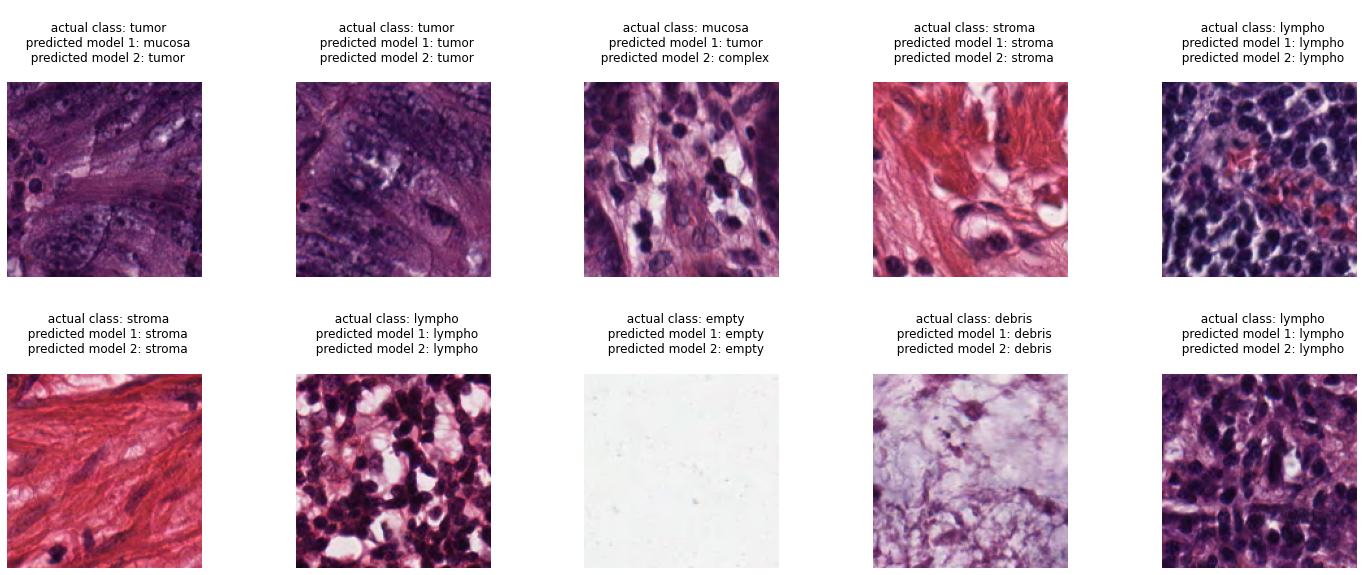

# **Load Data**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Modul 5/Dataset

/content/drive/MyDrive/Modul 5/Dataset


In [ ]:
from builtins import range, input

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, AveragePooling2D, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.applications import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import confusion_matrix, roc_curve
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


import cv2
from glob import glob

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.utils import to_categorical

In [ ]:
#Redefining size of each image of the dataset
IMAGE_SIZE = [229,229]

#Defining hyperparameters for training
epochs = 150
batch_size = 32

In [ ]:
#Defining paths
dement_path = '/content/drive/MyDrive/Modul 5/Dataset/Demented_Scan'
nondement_path = '/content/drive/MyDrive/Modul 5/Dataset/NonDemented_Scan'

In [ ]:
#Use glob to pull the images
NonDemfiles = glob( nondement_path +'/*' )
Demfiles = glob( dement_path + '/*' )

In [ ]:
#Visualize file variable images
print("First 5 NonDem Files: ",NonDemfiles[0:5])
print("Total Count: ",len(NonDemfiles))
print("First 5 ModDem Files: ",Demfiles[0:5])
print("Total Count: ",len(Demfiles))

First 5 NonDem Files:  ['/content/drive/MyDrive/Modul 5/Dataset/NonDemented_Scan/nonDem100.jpg', '/content/drive/MyDrive/Modul 5/Dataset/NonDemented_Scan/nonDem51.jpg', '/content/drive/MyDrive/Modul 5/Dataset/NonDemented_Scan/nonDem22.jpg', '/content/drive/MyDrive/Modul 5/Dataset/NonDemented_Scan/nonDem34.jpg', '/content/drive/MyDrive/Modul 5/Dataset/NonDemented_Scan/nonDem47.jpg']
Total Count:  100
First 5 ModDem Files:  ['/content/drive/MyDrive/Modul 5/Dataset/Demented_Scan/mildDem118.jpg', '/content/drive/MyDrive/Modul 5/Dataset/Demented_Scan/mildDem178.jpg', '/content/drive/MyDrive/Modul 5/Dataset/Demented_Scan/mildDem151.jpg', '/content/drive/MyDrive/Modul 5/Dataset/Demented_Scan/mildDem120.jpg', '/content/drive/MyDrive/Modul 5/Dataset/Demented_Scan/mildDem190.jpg']
Total Count:  100


In [ ]:
Dem_labels = []
NonDem_labels = []

Dem_images=[]
NonDem_images=[]

for i in range(len(Demfiles)):
  image = cv2.imread(Demfiles[i]) 
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 
  image = cv2.resize(image,(229,229)) 
  Dem_images.append(image) 
  Dem_labels.append('Demented') 
for i in range(len(NonDemfiles)):
  image = cv2.imread(NonDemfiles[i])
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  image = cv2.resize(image,(229,229))
  NonDem_images.append(image)
  NonDem_labels.append('NonDemented')

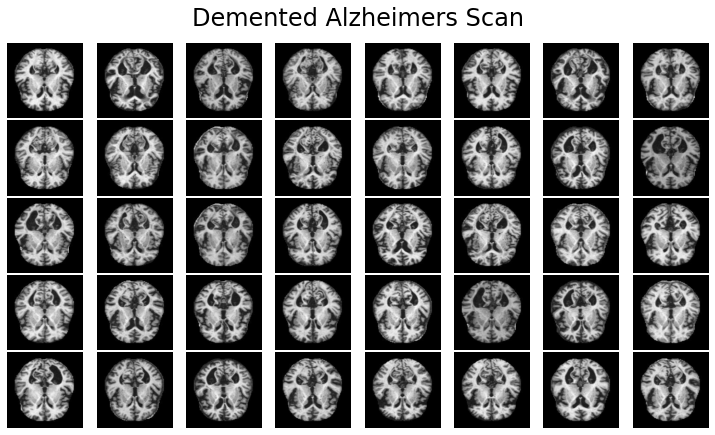

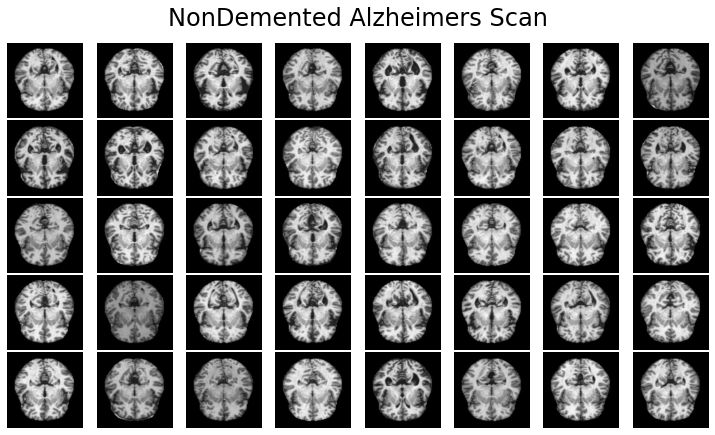

In [ ]:
def plot_images(images, title):
    nrows, ncols = 5, 8
    figsize = [10, 6]

    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize, facecolor=(1, 1, 1))

    for i, axi in enumerate(ax.flat):
        axi.imshow(images[i])
        axi.set_axis_off()

    plt.suptitle(title, fontsize=24)
    plt.tight_layout(pad=0.2, rect=[0, 0, 1, 0.9])
    plt.show()
plot_images(Dem_images, 'Demented Alzheimers Scan')
plot_images(NonDem_images, 'NonDemented Alzheimers Scan')

# **Pre-Processing**

In [ ]:
#Converting into arrays and normalize the colour values
Dem_images = np.array(Dem_images) / 255
NonDem_images = np.array(NonDem_images) / 255

In [ ]:
Dem_x_train, Dem_x_test, Dem_y_train, Dem_y_test = train_test_split(
    Dem_images, Dem_labels, test_size=0.2)
NonDem_x_train, NonDem_x_test, NonDem_y_train, NonDem_y_test = train_test_split(
    NonDem_images, NonDem_labels, test_size=0.2)


X_train = np.concatenate((NonDem_x_train, Dem_x_train), axis=0)
X_test = np.concatenate((NonDem_x_test, Dem_x_test), axis=0)
y_train = np.concatenate((NonDem_y_train, Dem_y_train), axis=0)
y_test = np.concatenate((NonDem_y_test, Dem_y_test), axis=0)

# make labels into categories - either 0 or 1
y_train = LabelBinarizer().fit_transform(y_train)
y_train = to_categorical(y_train)

y_test = LabelBinarizer().fit_transform(y_test)
y_test = to_categorical(y_test)

# **Modelling 1**

In [ ]:
VGGmodel = VGG19(weights="imagenet", include_top=False,
    input_tensor=Input(shape=(229, 229, 3)))

outputs = VGGmodel.output
outputs = Flatten(name="flatten")(outputs)
outputs = Dropout(0.4)(outputs)
outputs = Dense(2, activation="softmax")(outputs)

model = Model(inputs=VGGmodel.input, outputs=outputs)

for layer in VGGmodel.layers:
    layer.trainable = False

model.compile(
        loss='categorical_crossentropy', 
        optimizer='adam', 
        metrics=['accuracy']
)

80150528/80134624 [==============================] - 1s 0us/step


In [ ]:
#Visualize the model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 229, 229, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 229, 229, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 229, 229, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 114, 114, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 114, 114, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 114, 114, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 57, 57, 128)       0     

In [ ]:
train_aug = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

In [ ]:
history = model.fit(train_aug.flow(X_train, y_train, batch_size=batch_size),
                    validation_data=(X_test, y_test),
                    validation_steps=len(X_test) / batch_size,
                    steps_per_epoch=len(X_train) / batch_size,
                    epochs=epochs)

Epoch 1/150
5/5 [==============================] - 31s 2s/step - loss: 1.3238 - accuracy: 0.5625 - val_loss: 0.4818 - val_accuracy: 0.8250
Epoch 2/150
5/5 [==============================] - 4s 695ms/step - loss: 1.2228 - accuracy: 0.4938 - val_loss: 0.3024 - val_accuracy: 0.9500
Epoch 3/150
5/5 [==============================] - 4s 685ms/step - loss: 0.8332 - accuracy: 0.6125 - val_loss: 0.9281 - val_accuracy: 0.5000
Epoch 4/150
5/5 [==============================] - 3s 677ms/step - loss: 0.6372 - accuracy: 0.7125 - val_loss: 0.1623 - val_accuracy: 0.9750
Epoch 5/150
5/5 [==============================] - 3s 681ms/step - loss: 0.3899 - accuracy: 0.8062 - val_loss: 0.2202 - val_accuracy: 0.9250
Epoch 6/150
5/5 [==============================] - 4s 678ms/step - loss: 0.3247 - accuracy: 0.8562 - val_loss: 0.1261 - val_accuracy: 0.9500
Epoch 7/150
5/5 [==============================] - 4s 691ms/step - loss: 0.1876 - accuracy: 0.9375 - val_loss: 0.0955 - val_accuracy: 0.9500
Epoch 8/150
5/5

# **Uji coba prediksi 1**

In [ ]:
#Saving trained model and weights
model.save('vgg19_dem.h5')
model.save_weights('vgg19_weights_dem.hdf5')

In [ ]:
#Now load the saved model
model = load_model('vgg19_dem.h5')

In [ ]:
y_pred = model.predict(X_test, batch_size=batch_size)

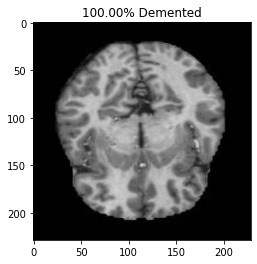

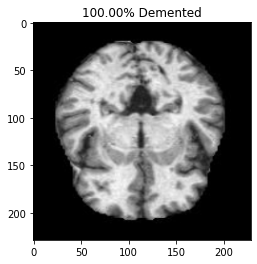

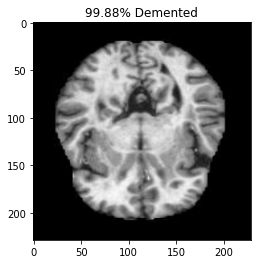

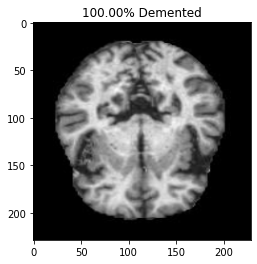

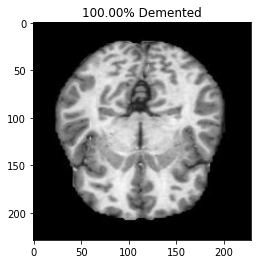

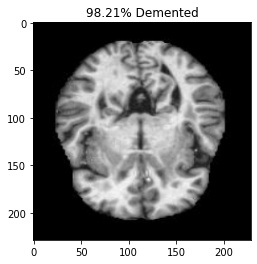

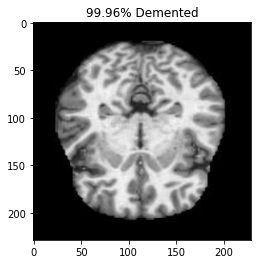

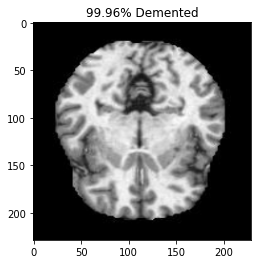

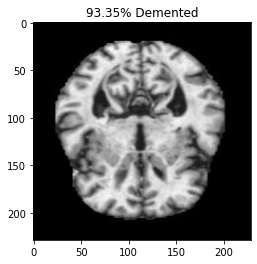

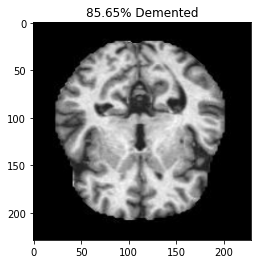

In [ ]:
prediction=y_pred[0:10]
for index, probability in enumerate(prediction):
  if probability[1] > 0.5:
        plt.title('%.2f' % (probability[1]*100) + '% Demented')
  else:
        plt.title('%.2f' % ((1-probability[1])*100) + '% NonDemented')
  plt.style.reload_library
  plt.imshow(X_test[index])
  plt.show()

# **Evaluasi model dan report 1**

In [ ]:
y_pred_bin = np.argmax(y_pred, axis=1)
y_test_bin = np.argmax(y_test, axis=1)

Confusion Matrix without Normalization


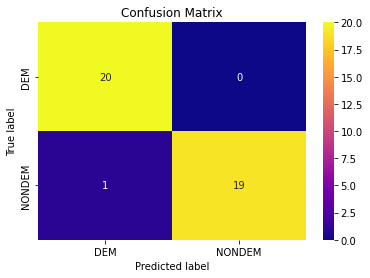

Confusion Matrix with Normalized Values


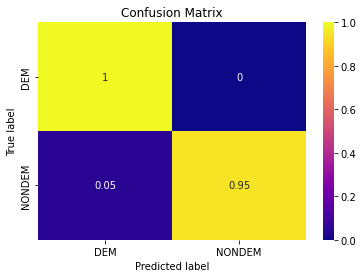

In [ ]:
def plot_confusion_matrix(normalize):
  classes = ['DEM','NONDEM']
  tick_marks = [0.5,1.5]
  cn = confusion_matrix(y_test_bin, y_pred_bin,normalize=normalize)
  sns.heatmap(cn,cmap='plasma',annot=True)
  plt.xticks(tick_marks, classes)
  plt.yticks(tick_marks, classes)
  plt.title('Confusion Matrix')
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

print('Confusion Matrix without Normalization')
plot_confusion_matrix(normalize=None)

print('Confusion Matrix with Normalized Values')
plot_confusion_matrix(normalize='true')

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test_bin, y_pred_bin))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98        20
           1       1.00      0.95      0.97        20

    accuracy                           0.97        40
   macro avg       0.98      0.97      0.97        40
weighted avg       0.98      0.97      0.97        40



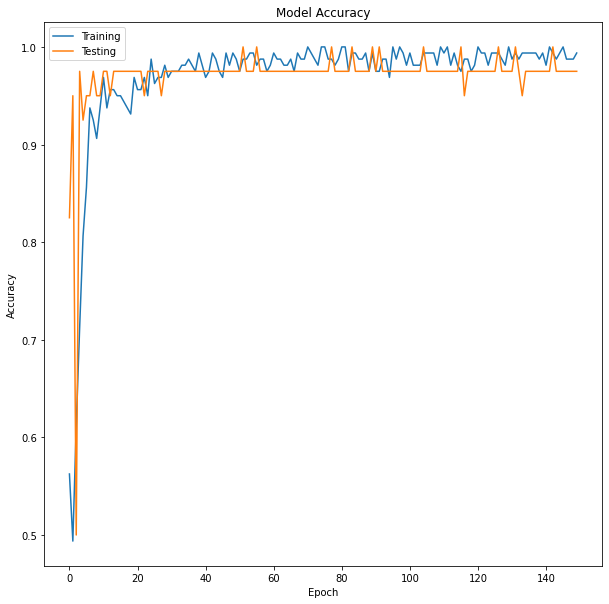

In [ ]:
plt.figure(figsize=(10,10))

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

plt.legend(['Training', 'Testing'])
plt.savefig('inception_ct_accuracy.png')
plt.show()

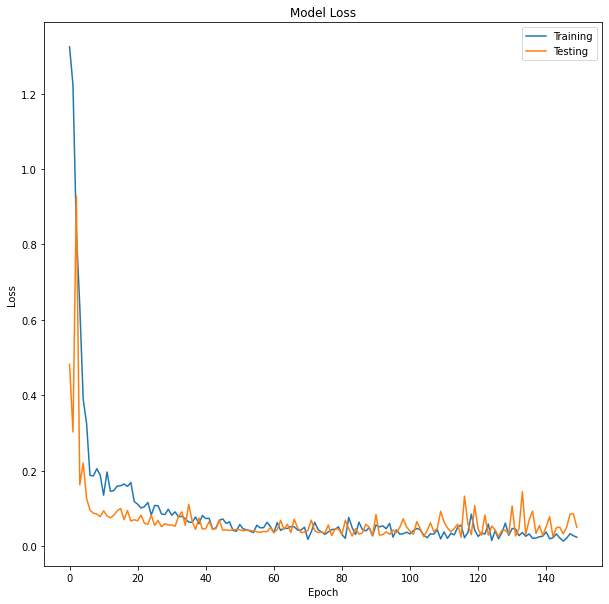

In [ ]:
plt.figure(figsize=(10,10))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')

plt.legend(['Training', 'Testing'])
plt.savefig('inception_dem_loss.png')
plt.show()

# **Modelling 2**

In [ ]:
from tensorflow.keras.applications import Xception

In [ ]:
xception = Xception(weights="imagenet", include_top=False,
    input_tensor=Input(shape=(229, 229, 3)))

outputs = xception.output
outputs = Flatten(name="flatten")(outputs)
outputs = Dropout(0.4)(outputs)
outputs = Dense(2, activation="softmax")(outputs)

model1 = Model(inputs=xception.input, outputs=outputs)

for layer in xception.layers:
    layer.trainable = False

model1.compile(
        loss='categorical_crossentropy', 
        optimizer='adam', 
        metrics=['accuracy']
)

In [ ]:
#Visualize the model
model1.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 229, 229, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 114, 114, 32  864         ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 114, 114, 32  128        ['block1_conv1[0][0]']           
 ation)                         )                                                           

In [ ]:
train_aug = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

In [ ]:
history2 = model1.fit(train_aug.flow(X_train, y_train, batch_size=batch_size),
                    validation_data=(X_test, y_test),
                    validation_steps=len(X_test) / batch_size,
                    steps_per_epoch=len(X_train) / batch_size,
                    epochs=epochs)

Epoch 1/150
5/5 [==============================] - 10s 1s/step - loss: 3.7898 - accuracy: 0.6000 - val_loss: 0.7238 - val_accuracy: 0.9000
Epoch 2/150
5/5 [==============================] - 3s 656ms/step - loss: 1.1003 - accuracy: 0.8625 - val_loss: 0.8402 - val_accuracy: 0.9000
Epoch 3/150
5/5 [==============================] - 3s 666ms/step - loss: 1.0678 - accuracy: 0.8438 - val_loss: 0.9139 - val_accuracy: 0.9250
Epoch 4/150
5/5 [==============================] - 3s 654ms/step - loss: 0.5398 - accuracy: 0.9250 - val_loss: 0.8854 - val_accuracy: 0.9250
Epoch 5/150
5/5 [==============================] - 3s 652ms/step - loss: 0.6280 - accuracy: 0.8875 - val_loss: 0.4059 - val_accuracy: 0.9250
Epoch 6/150
5/5 [==============================] - 3s 665ms/step - loss: 0.2582 - accuracy: 0.9438 - val_loss: 0.3176 - val_accuracy: 0.9250
Epoch 7/150
5/5 [==============================] - 3s 656ms/step - loss: 0.3825 - accuracy: 0.9250 - val_loss: 0.0702 - val_accuracy: 0.9750
Epoch 8/150
5/5

In [ ]:
#Saving trained model and weights
model1.save('xception_dem.h5')
model1.save_weights('xception_weights_dem.hdf5')

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


In [ ]:
#Now load the saved model
model1 = load_model('xception_dem.h5')

In [ ]:
y_pred1 = model1.predict(X_test, batch_size=batch_size)

# **Uji coba prediksi 2**

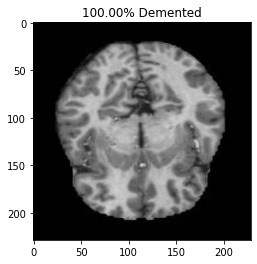

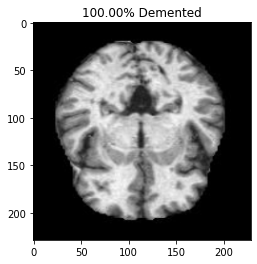

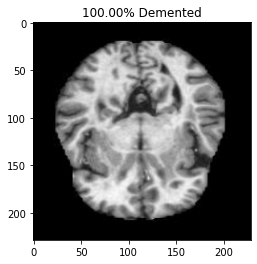

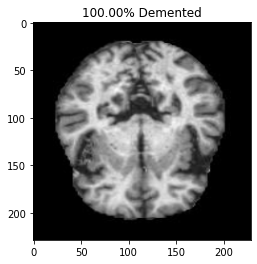

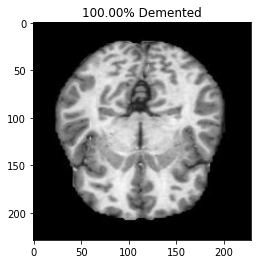

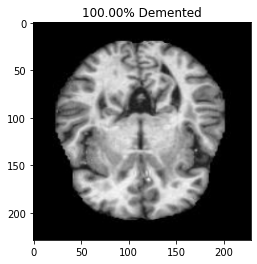

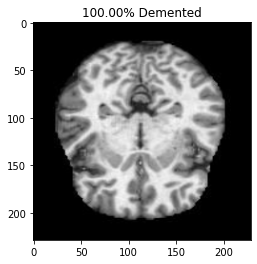

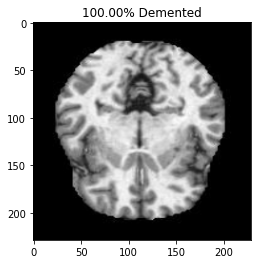

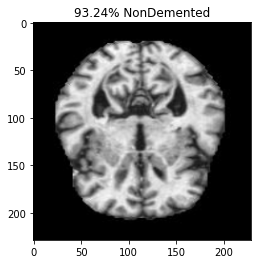

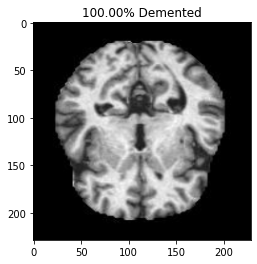

In [ ]:
prediction=y_pred1[0:10]
for index, probability in enumerate(prediction):
  if probability[1] > 0.5:
        plt.title('%.2f' % (probability[1]*100) + '% Demented')
  else:
        plt.title('%.2f' % ((1-probability[1])*100) + '% NonDemented')
  plt.style.reload_library
  plt.imshow(X_test[index])
  plt.show()

# **Evaluasi model dan report 2**

In [ ]:
y_pred_bin1 = np.argmax(y_pred1, axis=1)
y_test_bin1 = np.argmax(y_test, axis=1)

Confusion Matrix without Normalization


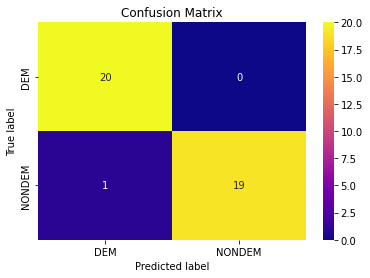

Confusion Matrix with Normalized Values


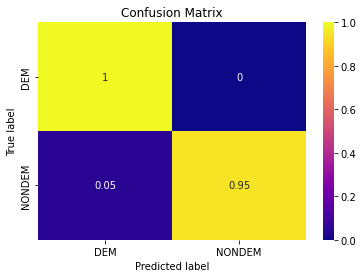

In [ ]:
def plot_confusion_matrix(normalize):
  classes = ['DEM','NONDEM']
  tick_marks = [0.5,1.5]
  cn = confusion_matrix(y_test_bin, y_pred_bin,normalize=normalize)
  sns.heatmap(cn,cmap='plasma',annot=True)
  plt.xticks(tick_marks, classes)
  plt.yticks(tick_marks, classes)
  plt.title('Confusion Matrix')
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

print('Confusion Matrix without Normalization')
plot_confusion_matrix(normalize=None)

print('Confusion Matrix with Normalized Values')
plot_confusion_matrix(normalize='true')

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test_bin, y_pred_bin1))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93        20
           1       1.00      0.85      0.92        20

    accuracy                           0.93        40
   macro avg       0.93      0.93      0.92        40
weighted avg       0.93      0.93      0.92        40



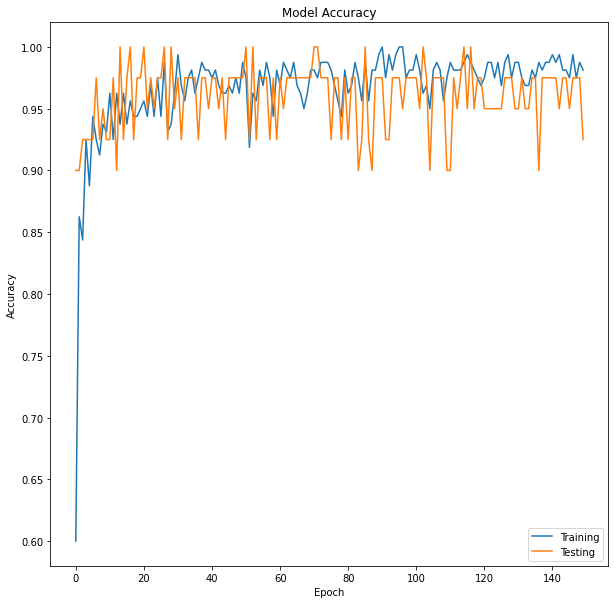

In [ ]:
plt.figure(figsize=(10,10))

plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])

plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

plt.legend(['Training', 'Testing'])
plt.savefig('xception_dem_accuracy.png')
plt.show()

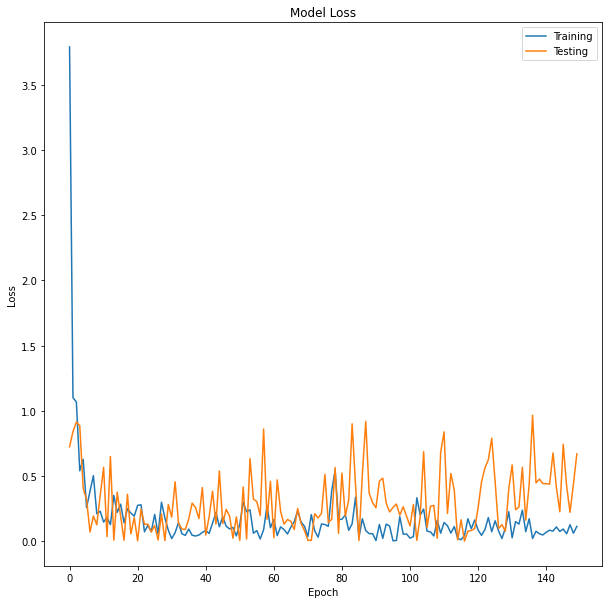

In [ ]:
plt.figure(figsize=(10,10))

plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])

plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')

plt.legend(['Training', 'Testing'])
plt.savefig('inception_dem_loss.png')
plt.show()

## Kegiatan 2 **(berkelompok)**
30 poin

**Ketentuan Wajib**
* Tulis dokumentasi tugas kelompok anda dalam file README.md
* Cek daftar dataset seluruh praktikan [disini](https://docs.google.com/spreadsheets/d/1qyu5AVDhPhegpRTbNaDoq5qXX4_CX09Q7tYyD-fkF_c/edit?usp=sharing)
* Seluruh data dan progress pengerjaan tugas kelompok harus berada dalam github repository sebelum praktikum dimulai
* Tidak diperbolehkan berganti anggota kelompok selama satu semester ini
* Tidak diperbolehkan berganti repository selama mengerjakan tugas kelompok ini
* **Tidak diperbolehkan berganti dataset atau jurnal rujukan**
* Pastikan anda menggunakan akun github pribadi untuk melakukan commit dan push

**Penilaian**
* Keaktifan dalam tim
* Kontribusi dalam proyek dan tim
* Penerapan prinsip kerja Agile (sprint backlog dan report terdokumentasikan dengan baik)
* Progress pengerjaan tugas kelompok
* Problem solving masing - masing anggota terhadap kendala yang dialami
* Pemahaman masing - masing anggota tim terhadap tugas yang dikerjakan
* Pendokumentasian proyek "clear and clean documentation"

**Materi pendukung**
* [Project documentation](https://realpython.com/documenting-python-code)
* [Github readme](https://docs.github.com/en/github/writing-on-github/getting-started-with-writing-and-formatting-on-github/basic-writing-and-formatting-syntax)
* [Sprint backlog](https://www.lucidchart.com/blog/how-to-develop-a-product-backlog-in-agile)

**Tugas**

Melanjutkan tugas kelompok di modul 1 sampai 3 sekarang kerjakan beberapa poin berikut untuk didemokan kepada asisten masing-masing.

*   Melakukan proses preprocessing dataset dengan ketentuan:
 * augmentasi data menggunakan ImageDataGenerator dan salah satu augmentasi opsional lain seperti (random noise, clahe, usuyama, blur, atau yang lainnya)
 * balancing dataset menggunakan teknik oversampling / downsampling
 * splitting dataset menjadi (75% train, 14% validation, 1% test)
*   Melakukan training beberapa skema model menggunakan pretrained model **(minimal 2 model)** dengan 100 epoch per model
* Menyimpan model yang telah di training kedalam file `.tflite`  [Lihat disini](https://www.tensorflow.org/lite/convert)
*  Mencatat hasil perkembangan tugas kelompok dalam file `sprint_project.xlsx` tandai masing-masing task dengan status **Done** *untuk task yang telah selesai dikerjakan*, **On Going** *untuk task yang dalam proses pengerjaan*, **Waiting** *untuk task yang belum atau akan dikerjakan*
* Pastikan anda menulis tanggal mulai dan tanggal selesai masing-masing task dengan benar
* Pastikan anda menulis penanggung jawab masing-masing task (Penanggung jawab bertugas menyelesaikan dan menuntaskan masing-masing task yang diberikan)
* `commit` dan `push` seluruh perkerjaan yang anda lakukan kedalam branch pribadi dalam repository tugas kelompok yang telah anda buat sebelumnya.
* Presentasikan kepada asisten tentang apa yang anda lakukakan selama mengerjakan tugas kelompok ini. Ceritakan tentang tugas masing-masing anggota,  kendala dalam mengerjakan tugas sampai solusi yang anda lakukan saat mengerjakan tugas kelompok ini.

